In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dataCollection import *

C:\Users\Harry\Documents\Home\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [3]:
OC = 'NGC_6819'

In [4]:
#step0: match apogee data with gaia data
#apogee_Teff = matchApogeeGaia('k2')

#step 1: get members in gaia IDs and write a simbad input file
gaia_IDs, member_df = genSimbad(OC, "{}/{}_simbad_input.txt".format(OC,OC))

#step 2: astroquery for gaia Gband mags, luminosities and distances, then tm_IDs
gaia_df = GAIA_query(gaia_IDs)
gaia_df = GAIA_query_tm(gaia_df, gaia_IDs)

#step 3: merging apogee_gaia df with gaia_df
step3_df = matchApogeeToData(gaia_df)

There is 1915 stars in the membership paper.
Simbad input txt file saved as "NGC_6819/NGC_6819_simbad_input.txt".
Launching GAIA query...


Obtained 1915 out of 1915 stars in the cluster.
Launching GAIA query...


1704 out of 1915 stars in the cluster have cross match 2MASS IDs.
Matching APOGEE Teffs to queried GAIA stars
Found 46 matching stars with APOGEE Teff data.


In [7]:
#step 4: read simbad output file and combine it to step3_df
step4_df = readSimbad(f'{OC}/{OC}_simbad_output.txt',step3_df)

#step 5: matching back in ra, dec and membership prob from membership paper, and apply membership cut for total membership>99%
step5_df = membershipCut(step4_df, member_df)

#step 6: Teff selection: 1.apogee, 2.singulars, 3.take away problematics, 
# 4.apply most widespread source of Teff until all multiples have Teff, 5.manual picking of problematics
assigned_df, problematic_df, final_ranks = assignTeff(step5_df)
final_ranks

Reading SIMBAD output and merging it to GAIA+APOGEE data...
found 1915 matching IDs
310 stars have Teff data
Found Teff for 310 stars between SIMBAD and APOGEE.
Matching in membership data and applying membership cut...
301/310 stars are taken as cluster members
Using APOGEE Teff for 43 stars.
There are 235 stars without APOGEE data and have Teff provided by only one paper.
Picking Teff automatically for 19 stars, 4 stars require manual picking.


C:\Users\Harry\Documents\work\year 4\4th year project\data collection\dataCollection.py:310: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Teff'][i] = paper[0]
C:\Users\Harry\Documents\work\year 4\4th year project\data collection\dataCollection.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ref'][i] = paper[2]


,ref,count
0,2015AJ....149..121L,244.0
1,2016A&A...594A..39F,5.0
2,2018ApJS...236..42Y,4.0
3,2011AJ....141...83P,1.0


In [8]:
problematic_df = replaceManual(problematic_df,final_ranks)

Star 1/4, GAIA ID: 2076487499307051008
0: 5765.0 2015RAA....15.1197Z 0 entries
1: 6078.0 2015AJ....149..121L 244 entries
Teff choice?1


C:\Users\Harry\Documents\work\year 4\4th year project\data collection\dataCollection.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Teff'][i] = Teff[decision_index]
C:\Users\Harry\Documents\work\year 4\4th year project\data collection\dataCollection.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ref'][i] = ref[decision_index]



Star 2/4, GAIA ID: 2076487774185029504
0: 5039.0 2018ApJS...236..42Y 4 entries
1: 4849.0 2015AJ....149..121L 244 entries
Teff choice?1

Star 3/4, GAIA ID: 2076594014494651136
0: 4865.0 2018ApJS...236..42Y 4 entries
1: 4568.0 2016A&A...594A..39F 5 entries
Teff choice?1

Star 4/4, GAIA ID: 2076600886442113280
0: 4737.0 2018ApJS...236..42Y 4 entries
1: 4758.0 2016A&A...594A..39F 5 entries
2: 4857.0 2015RAA....15.1197Z 0 entries
Teff choice?1



In [9]:
step6_df = pd.concat([assigned_df,problematic_df])
step6_df.sort_index(inplace=True)

In [10]:
#listing all papers to google
countUniqueRefs(step6_df, column='ref')

,ref,count
0,2015AJ....149..121L,246.0
1,apogee,43.0
2,2016A&A...594A..39F,7.0
3,2018ApJS...236..42Y,4.0
4,2011AJ....141...83P,1.0


In [11]:
#Matching Teff errors from papers:
#ra,dec,TEFF,TEFF_ERR
#resulting_df = matchTeff_err(step6_df, '2011AJ....141...89S', OC+'/2011AJ....141...89S_Teff.txt',2,3,6,7)
#resulting_df = fixedTeff_err(resulting_df, '2011AJ....142...59J', 200)
#resulting_df.drop(index=resulting_df[resulting_df['ref']=='2018MNRAS.480.4314B'].index, inplace=True)

resulting_df = fixedTeff_err(step6_df, '2015AJ....149..121L', 32)
resulting_df = matchTeff_err(resulting_df, '2016A&A...594A..39F', OC+'/2016A&A...594A..39F.txt',4,5,7,8)
resulting_df = matchTeff_err(resulting_df, '2018ApJS...236..42Y', OC+'/2018ApJS...236..42Y_Teff1.txt',20,21,1,2)
step7_df = fixedTeff_err(resulting_df, '2011AJ....141...83P', 6075.0*0.15)

C:\Users\Harry\Documents\work\year 4\4th year project\data collection\dataCollection.py:521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Teff_err'][i]=Teff_err
C:\Users\Harry\Documents\work\year 4\4th year project\data collection\dataCollection.py:503: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Teff_err'][i] = list(suspect_df['Teff_err'])[np.argmin(angular_dist)]


In [12]:
###########################################
#checking teffs for prev cell
step6_df[step6_df["ref"]=="2011AJ....141...83P"]

,ID,g_mag,g_mag_err,A_G,gaia_lum,gaia_lum_err,distance,distance_err,Teff,Teff_err,ref,feh_table,feh_count,ra,dec,mem_prob
5,2076294672459697536,15.356282,0.007572,NaN,5.354074,1.196535,2898.725373,271.086965,6075.0,911.25,2011AJ....141...83P,"[[6075.0, None, 2011AJ....141...83P]]",1.0,295.354161,40.002915,1.0


In [13]:
#DOWNLOAD DUSTMAP FOR THIS REGION BY GETTING THE RA AND DEC FROM SIMBAD AND PASSING IT THROUGH THE FOLLOWING
#FUNCTION AND THEN PUT THE OUTPUT INTO: #http://argonaut.skymaps.info/query
ra_dec_conv(s="19 41 18.0",r="+40 11 12") 

295.325 40.18666666666666


In [14]:
dist = step7_df['distance']
dist = dist[np.logical_not(np.isnan(dist))]
dist_err = step7_df['distance_err']
dist_err = dist_err[np.logical_not(np.isnan(dist_err))]
mean_dist = np.sum(dist*dist_err**(-2))/np.sum(dist_err**(-2))
mean_dist_err = np.sqrt(1/np.sum(dist_err**(-2)))
print(mean_dist_err)
luminosity, luminosity_err = lum_calc(OC, step7_df['g_mag'], step7_df['g_mag_err'], mean_dist, mean_dist_err, list(step7_df['Teff']), list(step7_df['Teff_err']))
step8_df = step7_df.copy()
step8_df['cal_lum'] = luminosity
step8_df['cal_lum_err'] = luminosity_err
step8_df.dropna(subset=['cal_lum'],inplace=True)

9.646621585243578


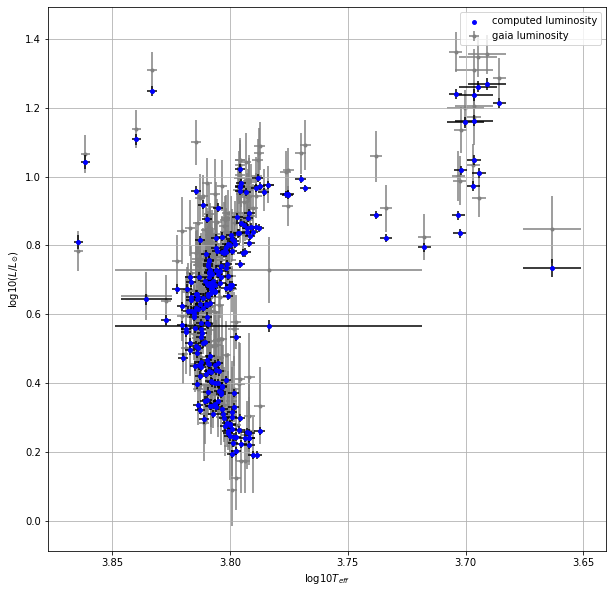

In [15]:
#apply cut that removes RGB stars
step8_df['value'] = 10*np.log10(step8_df['Teff'])-np.log10(step8_df['cal_lum'])-35.5
cut_df = step8_df[step8_df['value']>0].copy()

#plotting cluster to count number of blue stragglers, and other stars to remove
plotCluster(cut_df, plot_gaia=True)

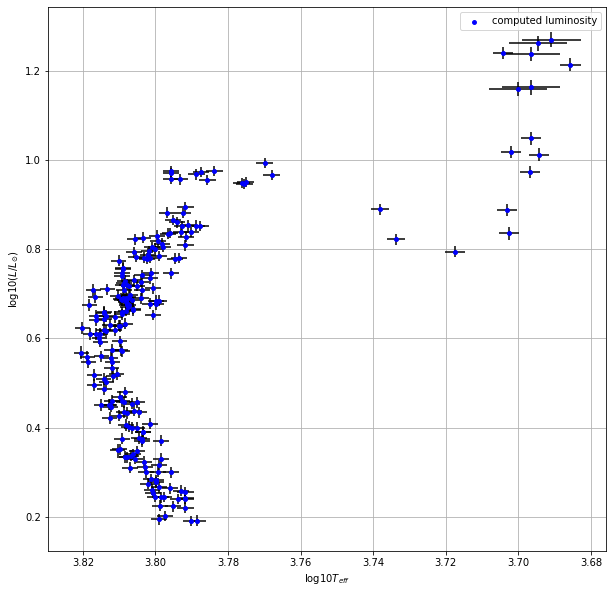

219


In [45]:
#removing blue stragglers
high_Teff_IDs = np.array(cut_df['ID'])[np.argsort(cut_df['Teff'])[-7:]]
step9_df = cut_df.drop(index=step8_df[step8_df['ID'].isin(high_Teff_IDs)].index)


#removing other weird stars



step9_df = removeStars(step9_df, 3.82, 0.48,1)
step9_df = removeStars(step9_df, 3.815, 0.82,1)

step9_df = removeStars(step9_df, 3.82, 1,1)
step9_df = removeStars(step9_df, 3.81, 0.9,3)
step9_df = removeStars(step9_df, 3.66, 0.72,1)
step9_df = removeStars(step9_df, 3.81, 1.15,3)
step9_df = removeStars(step9_df,3.785,0.5,1)
step9_df = removeStars(step9_df,3.79,0.55,1)
step9_df = removeStars(step9_df, 3.812, 0.4,1)
step9_df = removeStars(step9_df, 3.82, 0.3,2)
step9_df = removeStars(step9_df, 3.82, 0.35,1)
step9_df = removeStars(step9_df, 3.785, 0.25,1)

plotCluster(step9_df)
print(len(step9_df.index))
#plotCluster(step9_df, plot_gaia=True, plot_train=True, grid_path='C:/Users/Harry/Documents/work/year 4/4th year project/Modelling/NN/grid learning/Hin files/grid2_early.csv')

In [46]:
#save data to csv
step9_df.to_csv(f'{OC}/{OC}_final.csv',index=False)